# Applying DNN - Deep Neural Network on our quora question pair similarity(Extracted features)

## DNN:
> The term "deep" in DNN refers to the presence of multiple hidden layers in the network. Deep architectures allow DNNs to learn hierarchical representations of data, enabling them to capture complex patterns and relationships in the input data. These networks are capable of automatically learning features and patterns from raw data, which makes them highly effective in tasks such as image and speech recognition, natural language processing, and many other areas of machine learning. 

## DNN Training:
> Training a DNN involves a process called backpropagation, where the network adjusts its weights based on the error between its predicted output and the desired output. This process is typically performed using large amounts of labeled training data and an optimization algorithm, such as stochastic gradient descent, to iteratively update the network's parameters

## Import necessary Libraries

In [178]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [179]:
#pip install tensorflow

In [180]:
import tensorflow as tf
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

## Load the data and Performing little bit of EDA

In [181]:
df = pd.read_csv(r"D:\Deep_learning\internship project\updated.csv",index_col = 0)

In [182]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,common_words,fuzz_ratio,...,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance
0,0,1,2,what step step guide invest share market india?,what step step guide invest share market?,0,47,41,5,93,...,92,100,93,0.033067,3.562469,1.0,89.439283,0.257166,0.115104,0.159782
1,1,3,4,what story kohinoor (koh-i-noor) diamond?,what would happen indian government stole kohi...,0,41,77,3,66,...,82,91,64,0.504745,13.048161,1.0,183.543221,1.004734,0.507498,0.613816
2,2,5,6,how i increase speed internet connection using...,how internet speed increased hacking dns?,0,51,41,3,48,...,80,67,67,0.190421,8.554435,1.0,148.870227,0.617124,0.276275,0.372139
3,3,7,8,why i mentally lonely? how i solve it?,find remainder [math]23^{24}[/math] divided 2423?,0,38,49,0,11,...,29,28,25,0.546846,14.241201,1.0,192.699511,1.045798,0.478082,0.667696
4,4,9,10,"which one dissolve water quikly sugar, salt, m...",which fish would survive salt water?,0,69,36,1,34,...,71,63,48,0.293943,10.575400,1.0,167.870487,0.766738,0.351893,0.471646


In [183]:
df.isna().sum() # no missing values

id                                 0
qid1                               0
qid2                               0
question1                          6
question2                          1
is_duplicate                       0
len_q1                             0
len_q2                             0
common_words                       0
fuzz_ratio                         0
fuzz_partial_ratio                 0
fuzz_partial_token_set_ratio       0
fuzz_partial_token_sort_ratio      0
fuzz_token_set_ratio               0
fuzz_token_sort_ratio              0
cosine_distance                    0
cityblock_distance                 0
jaccard_distance                   0
canberra_distance                  0
euclidean_distance                 0
minkowski_distance                 0
braycurtis_distance              425
dtype: int64

In [184]:
df.dropna(axis = 0, inplace = True)

In [185]:
df = df.reset_index(drop = 'first')

In [186]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,common_words,fuzz_ratio,...,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance
0,0,1,2,what step step guide invest share market india?,what step step guide invest share market?,0,47,41,5,93,...,92,100,93,0.033067,3.562469,1.0,89.439283,0.257166,0.115104,0.159782
1,1,3,4,what story kohinoor (koh-i-noor) diamond?,what would happen indian government stole kohi...,0,41,77,3,66,...,82,91,64,0.504745,13.048161,1.0,183.543221,1.004734,0.507498,0.613816
2,2,5,6,how i increase speed internet connection using...,how internet speed increased hacking dns?,0,51,41,3,48,...,80,67,67,0.190421,8.554435,1.0,148.870227,0.617124,0.276275,0.372139
3,3,7,8,why i mentally lonely? how i solve it?,find remainder [math]23^{24}[/math] divided 2423?,0,38,49,0,11,...,29,28,25,0.546846,14.241201,1.0,192.699511,1.045798,0.478082,0.667696
4,4,9,10,"which one dissolve water quikly sugar, salt, m...",which fish would survive salt water?,0,69,36,1,34,...,71,63,48,0.293943,10.575400,1.0,167.870487,0.766738,0.351893,0.471646


In [187]:
df.drop(['question1','question2'],axis = 1,inplace = True)

## Applying PCA -Principal component analysis

In [188]:
y = df['is_duplicate'] # Seggregating the data to input and output
X = df[['len_q1','len_q2','common_words','fuzz_ratio','fuzz_partial_ratio','fuzz_partial_token_sort_ratio','fuzz_token_set_ratio','fuzz_token_sort_ratio','canberra_distance', 'cosine_distance','cityblock_distance','euclidean_distance',
                'minkowski_distance']]
X.head()
y

,len_q1,len_q2,common_words,fuzz_ratio,fuzz_partial_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,canberra_distance,cosine_distance,cityblock_distance,euclidean_distance,minkowski_distance
0,47,41,5,93,98,92,100,93,89.439283,0.033067,3.562469,0.257166,0.115104
1,41,77,3,66,85,82,91,64,183.543221,0.504745,13.048161,1.004734,0.507498
2,51,41,3,48,45,80,67,67,148.870227,0.190421,8.554435,0.617124,0.276275
3,38,49,0,11,19,29,28,25,192.699511,0.546846,14.241201,1.045798,0.478082
4,69,36,1,34,50,71,63,48,167.870487,0.293943,10.575400,0.766738,0.351893


0         0
1         0
2         0
3         0
4         0
         ..
403851    0
403852    1
403853    0
403854    0
403855    0
Name: is_duplicate, Length: 403856, dtype: int64

In [189]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(403856, 13)


In [190]:
# initializing the pca
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(standardized_data)

pca.components_  # To get the principle components (eigen vectors)


PCA()

array([[ 8.96746611e-02,  8.59137446e-02, -2.28709233e-01,
        -3.00509698e-01, -2.93457050e-01, -2.99095222e-01,
        -3.06798192e-01, -3.10471184e-01,  3.00844019e-01,
         2.98193510e-01,  3.15450370e-01,  3.15087254e-01,
         3.12498649e-01],
       [ 5.94821967e-01,  5.95768440e-01,  3.36762528e-01,
        -1.63080719e-01, -1.51632207e-01, -1.17521355e-01,
        -8.32917244e-02, -8.94804979e-02, -5.84905868e-02,
        -1.67129838e-01, -1.46102595e-01, -1.50047803e-01,
        -1.55822857e-01],
       [ 1.84707358e-01,  1.50362578e-01,  4.49798635e-01,
         2.83297823e-01,  2.85061105e-01,  2.24601565e-01,
         2.25190398e-01,  2.29003739e-01,  3.01177727e-01,
         2.54151611e-01,  2.95392041e-01,  2.99733532e-01,
         3.05681174e-01],
       [-6.90587153e-01,  7.21979363e-01, -2.10866301e-02,
         1.08988309e-02,  4.95356082e-03,  1.20893120e-02,
         1.79550840e-02,  1.62049930e-02,  1.65047448e-02,
         2.51632616e-03,  6.97030364e

In [191]:
pca.explained_variance_ratio_  ## eigen values (importance)

np.cumsum(pca.explained_variance_ratio_)

np.arange(len(pca.explained_variance_ratio_))

array([6.78579501e-01, 1.36104930e-01, 7.02449024e-02, 3.89338249e-02,
       2.07665693e-02, 1.76400748e-02, 1.53897362e-02, 1.00018056e-02,
       7.49784487e-03, 3.03363261e-03, 1.22915922e-03, 5.67468549e-04,
       1.05504330e-05])

array([0.6785795 , 0.81468443, 0.88492933, 0.92386316, 0.94462973,
       0.9622698 , 0.97765954, 0.98766134, 0.99515919, 0.99819282,
       0.99942198, 0.99998945, 1.        ])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Observation:
* We can observe that the initial two features are obtaining a variance of 81%

In [192]:
# configuring the parameteres
# number of components = 5
pca_new = PCA(n_components = 5)
pca_new_data = pca_new.fit_transform(standardized_data)

# Lets look at the shape of data after PCA
print("shape = ", pca_new_data.shape)

shape =  (403856, 5)


In [193]:
pca_df = pd.DataFrame(data=pca_new_data, columns=("1st_principal", "2nd_principal",'3st_principal','4st_principal',
                                                  '5st_principal'))
pca_df["is_duplicate"] = y.values

pca_df

,1st_principal,2nd_principal,3st_principal,4st_principal,5st_principal,is_duplicate
0,-4.080959,0.235514,0.711727,-0.172987,0.150387,0
1,1.249144,-0.529393,2.839361,1.155877,0.923266,0
2,0.369920,0.320865,-0.203052,-0.314292,0.438948,0
3,5.758527,-0.211669,-1.278901,0.293893,-0.481510,0
4,2.020999,0.216802,-0.296296,-1.010892,0.966579,0
...,...,...,...,...,...,...
403851,-3.306257,1.230305,1.760782,-0.088035,-0.300136,0
403852,-1.592263,-0.920651,-1.488961,-0.085272,-0.426909,1
403853,-1.870186,-2.102725,0.035900,0.007502,0.083947,0
403854,5.441765,1.023857,0.442319,0.675175,0.454400,0


In [194]:
pca_df1 = pca_df[pca_df.is_duplicate == 0].sample(n =500, random_state=42,axis = 0 )
pca_df1.reset_index(inplace = True,drop = 'first' )

In [195]:
pca_df2 = pca_df[pca_df.is_duplicate == 1].sample(n =500, random_state=42,axis = 0 )
pca_df2.reset_index(inplace = True,drop = 'first' )
final_df = pd.concat([pca_df1,pca_df2],axis = 0)

In [211]:
# shuffle the DataFrame rows
'''doc_string - Fraction of axis items to return. Cannot be used with `n`'''
final_df = final_df.sample(frac = 1)
final_df.reset_index(inplace = True, drop = 'first')
final_df

'doc_string - Fraction of axis items to return. Cannot be used with `n`'

,1st_principal,2nd_principal,3st_principal,4st_principal,5st_principal,is_duplicate
0,0.968496,-0.159484,0.932994,-1.017709,0.449903,0
1,-4.995587,-0.205724,-1.665774,-0.222415,0.258237,1
2,-1.831372,-1.097176,-0.950520,0.217252,-0.148287,1
3,0.721516,2.216077,-0.809064,-0.589912,1.109560,0
4,3.436670,2.440712,-0.658488,-2.238361,0.767455,0
...,...,...,...,...,...,...
995,-0.702502,0.068904,0.450678,1.321870,0.949530,0
996,-4.129659,1.041315,0.826357,0.115549,-0.499116,1
997,-3.558319,-0.627467,0.431715,0.181727,-0.485591,1
998,6.297464,-0.854490,-0.197294,-0.010268,-0.542334,0


In [212]:
y=final_df['is_duplicate']
X=final_df[["1st_principal", "2nd_principal"]] 

In [213]:
from sklearn.model_selection import train_test_split # Test - Train 
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Building DNN Dense Architecture

In [214]:
model = Sequential()
model.add(Dense(6,activation='relu',kernel_initializer = 'glorot_normal', input_dim = 2))
model.add(Dense(5,activation='relu',kernel_initializer = 'glorot_normal'))
model.add(Dense(4,activation='relu',kernel_initializer = 'glorot_normal'))
model.add(Dense(2,activation='relu',kernel_initializer = 'glorot_normal'))
model.add(Dense(1,activation='sigmoid'))

In [215]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 6)                 18        
                                                                 
 dense_45 (Dense)            (None, 5)                 35        
                                                                 
 dense_46 (Dense)            (None, 4)                 24        
                                                                 
 dense_47 (Dense)            (None, 2)                 10        
                                                                 
 dense_48 (Dense)            (None, 1)                 3         
                                                                 
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


In [216]:
call=EarlyStopping(monitor='val_accuracy',
    min_delta=0.0000001,
    patience=10,
    verbose=0,
    mode='auto')

## Compiling the Architecture & Model Creation

In [221]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

## Model Training Phase

In [222]:
history = model.fit(X_train.values,y_train,epochs = 30,validation_split = 0.2,batch_size = 250,callbacks=call )

Epoch 1/30
3/3 [==============================] - 1s 67ms/step - loss: 0.6910 - accuracy: 0.5571 - val_loss: 0.6889 - val_accuracy: 0.4857
Epoch 2/30
3/3 [==============================] - 0s 17ms/step - loss: 0.6898 - accuracy: 0.5054 - val_loss: 0.6877 - val_accuracy: 0.4857
Epoch 3/30
3/3 [==============================] - 0s 16ms/step - loss: 0.6886 - accuracy: 0.5054 - val_loss: 0.6866 - val_accuracy: 0.4857
Epoch 4/30
3/3 [==============================] - 0s 16ms/step - loss: 0.6875 - accuracy: 0.5196 - val_loss: 0.6854 - val_accuracy: 0.6714
Epoch 5/30
3/3 [==============================] - 0s 15ms/step - loss: 0.6864 - accuracy: 0.6643 - val_loss: 0.6843 - val_accuracy: 0.6714
Epoch 6/30
3/3 [==============================] - 0s 14ms/step - loss: 0.6852 - accuracy: 0.6607 - val_loss: 0.6831 - val_accuracy: 0.6786
Epoch 7/30
3/3 [==============================] - 0s 14ms/step - loss: 0.6840 - accuracy: 0.6625 - val_loss: 0.6819 - val_accuracy: 0.6714
Epoch 8/30
3/3 [===========

## Prediction Phase

In [223]:
Y_cap = model.predict(X_test)

10/10 [==============================] - 0s 936us/step


In [224]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [225]:
Y_cap_f

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

## Model Evaluation

In [226]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.72

## Ploting the Best Decision Surface Region

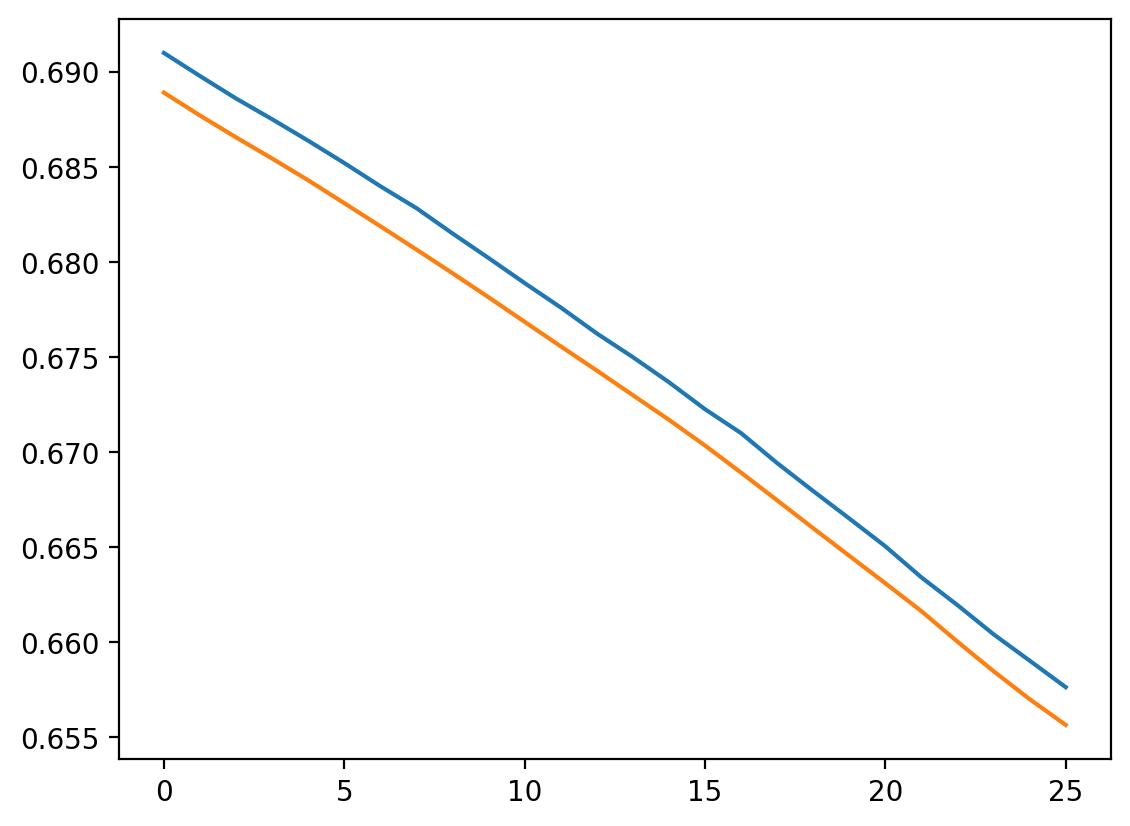

In [227]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

9600/9600 [==============================] - 8s 840us/step


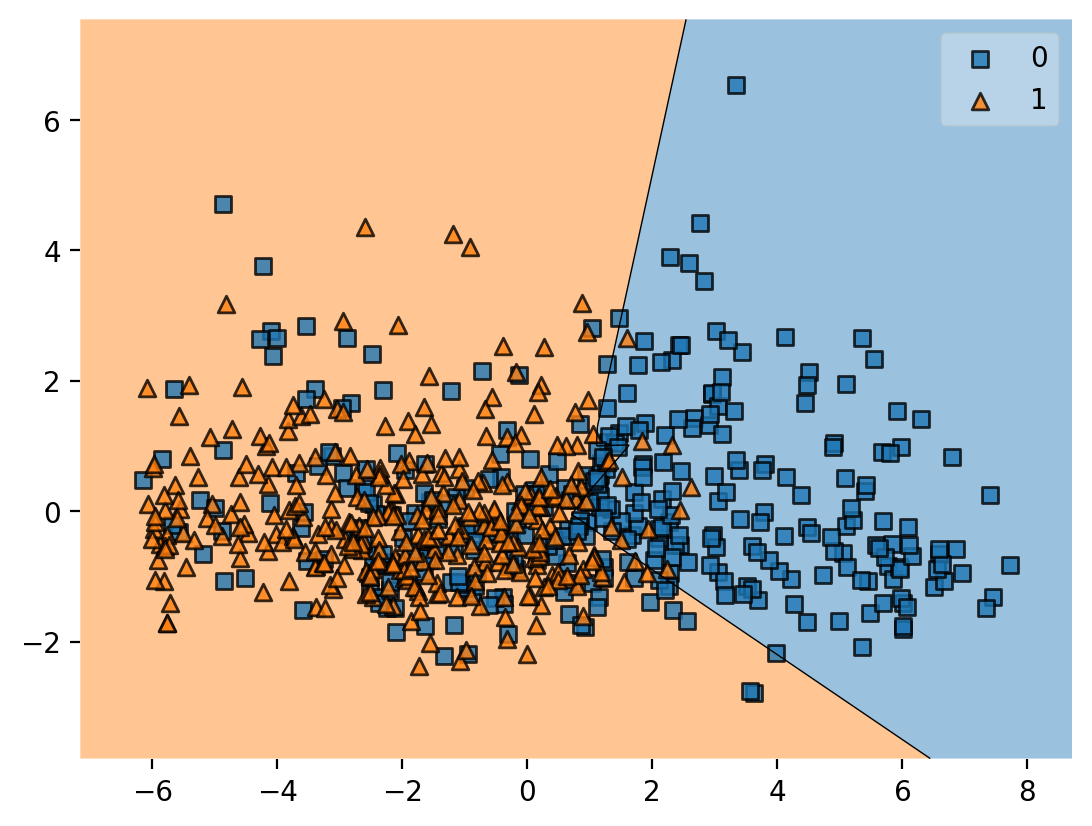

In [228]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train.values, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 8s 781us/step


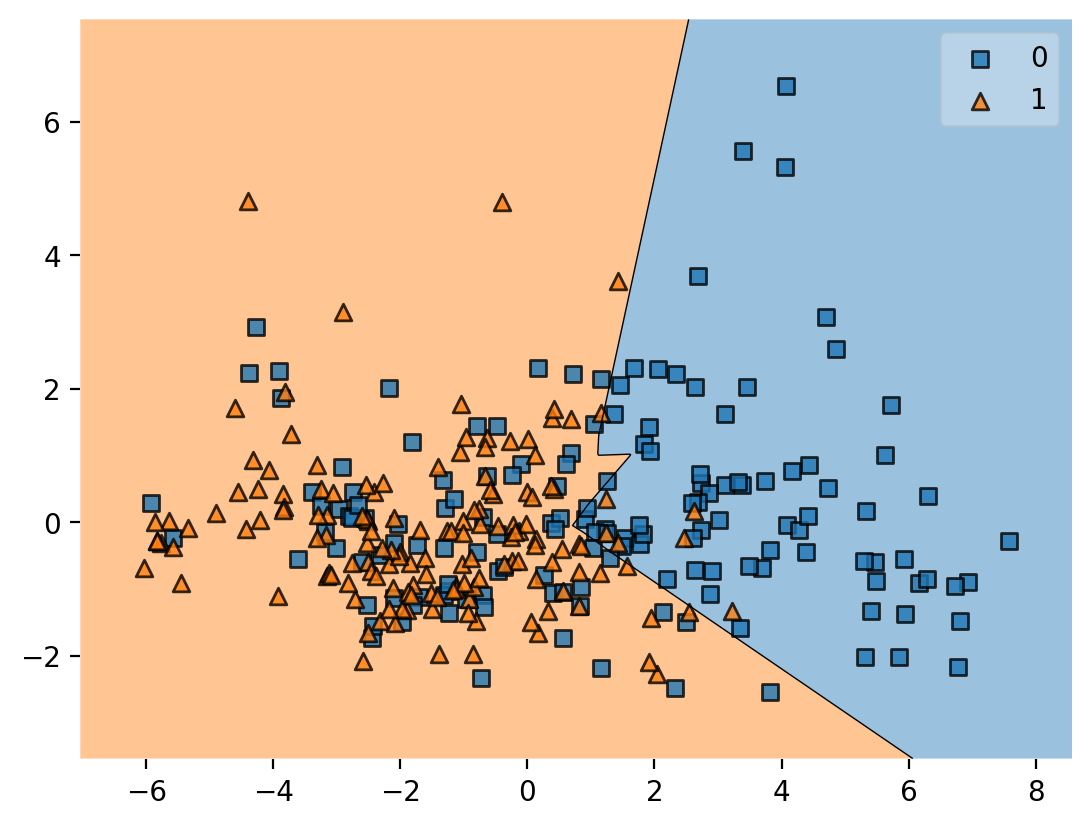

In [229]:
plot_decision_regions(X_test.values, y_test.values.astype(int), clf = model);

* ## Conclusions:
* The train score turned out to be `72.86% and validation score 73.57%.`
* I have predicted and evaluated the model’s performance, got a score of `72% on the unseen data.`
* There is no overfiting as the train score and the test score almost equal which proves that my model has learned well from the train data and predicted well on the unseen data.
* As we know for a best fit model the train and test score should be as high as possible.Here in our model case the train and test score are not that high but are significnatly good.